In [26]:
import pandas as pd

df_main = pd.read_csv("https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv")
df_main.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


1. Casting the column Price to an integer type

In [28]:
# Convert to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Calculate initial percentage of NaN values
initial_nan_percentage = df['Price'].isna().mean() * 100

# NaN Values

# Fill NaN with a specific value (0)
df['Price'] = df['Price'].fillna(0)

# Drop rows with NaN values
# df = df.dropna(subset=['Price'])

# Calculate final percentage of NaN values
final_nan_percentage = df['Price'].isna().mean() * 100

# Calculate the percentage of NaN values erased
nan_erased_percentage = initial_nan_percentage - final_nan_percentage

print(f"Initial NaN Percentage: {initial_nan_percentage}%")
print(f"Final NaN Percentage: {final_nan_percentage}%")
print(f"Percentage of NaN Values Erased: {nan_erased_percentage}%")


Initial NaN Percentage: 0.0%
Final NaN Percentage: 0.0%
Percentage of NaN Values Erased: 0.0%


In [29]:

# Convert to numeric, coercing errors to NaN
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Fill NaN with a specific value (e.g., 0)
df['Price'] = df['Price'].fillna(0)

# Convert to integer
df['Price'] = df['Price'].astype(int)

print(df)
print(df['Price'].dtype)


   PropertySize   Price
0          1000  200000
1          1500  250000
2          2000  300000
3          2500  350000
4          3000  400000
5          3500  450000
6          4000  500000
7          4500  550000
8          5000  600000
9          5500  650000
int32


2. Calculate the most common type of property and what percentaje of the properties it represents.


In [31]:
# Calculate the most common property type
most_common_type = df_main['Type'].value_counts().idxmax()

# Calculate the percentage of the most common property type
total_properties = df_main['Type'].count()
most_common_count = df_main['Type'].value_counts().max()
percentage_most_common = (most_common_count / total_properties) * 100

print(f"The most common property type is: {most_common_type}")
print(f"It represents {percentage_most_common:.2f}% of the properties.")


The most common property type is: h
It represents 68.80% of the properties.


3. Create a graph to show the frequency of each property type in descending order.

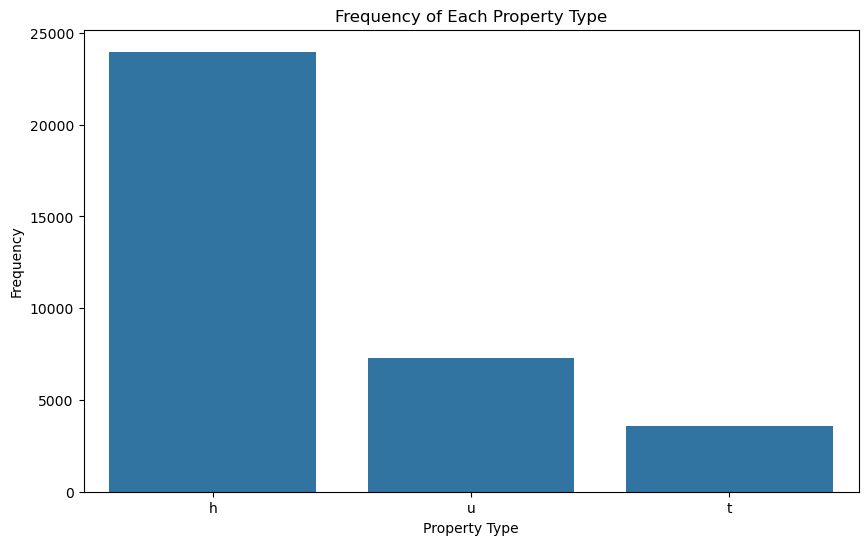

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the frequency of each property type
property_counts = df_main['Type'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=property_counts.index, y=property_counts.values, order=property_counts.index)
plt.title('Frequency of Each Property Type')
plt.xlabel('Property Type')
plt.ylabel('Frequency')
plt.show()


4. Median

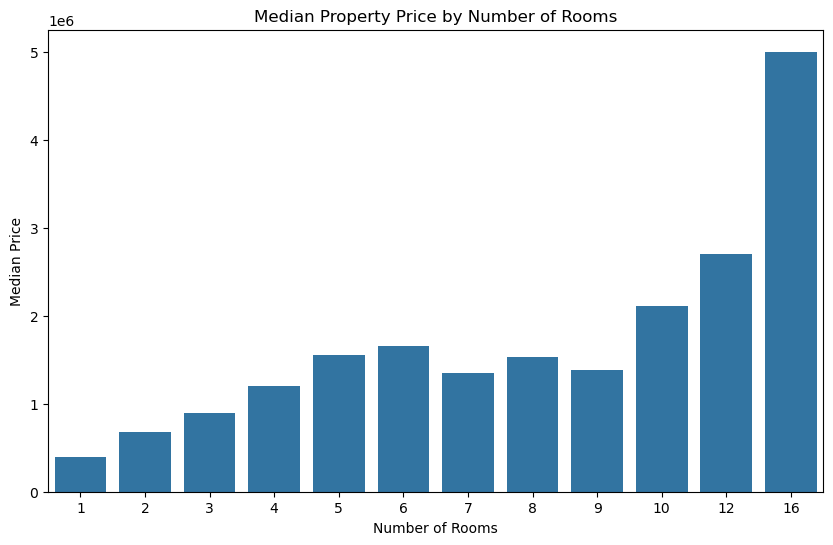

In [33]:

# Calculate median price for each room count
median_prices = df_main.groupby('Rooms')['Price'].median().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Rooms', y='Price', data=median_prices, order=median_prices['Rooms'])
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price')
plt.show()


5. Spearman

In [38]:
import pandas as pd
from scipy.stats import spearmanr

# Calculate Spearman correlation coefficient
corr, p_value = spearmanr(df_main['Rooms'], df_main['Price'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


Spearman correlation coefficient: nan
P-value: nan


6. scatterplot

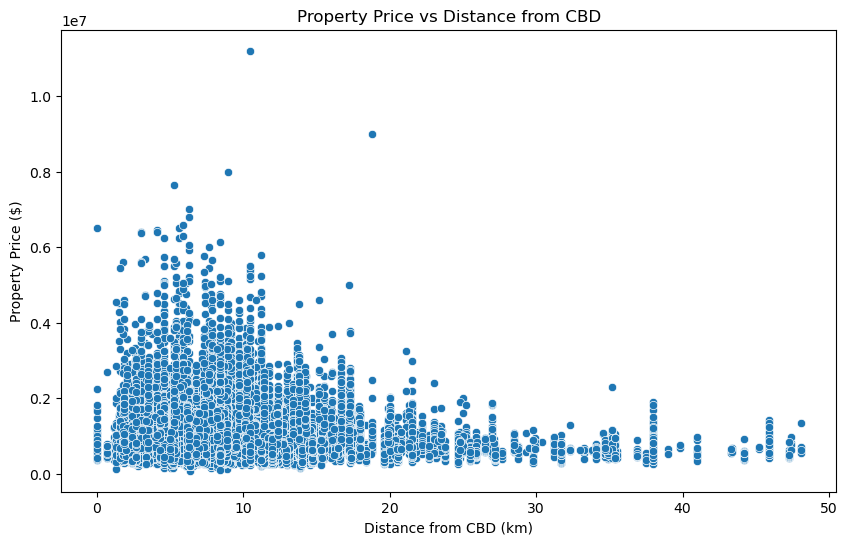

Spearman correlation coefficient: nan
P-value: nan


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df_main)
plt.title('Property Price vs Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price ($)')
plt.show()

# Calculate Spearman correlation coefficient
corr, p_value = spearmanr(df_main['Distance'], df_main['Price'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


7. Spearman

Suburb                  0
Address                 0
Rooms                   0
Type                    0
Price                   0
Method                  0
SellerG                 0
Date                    0
Distance                0
Postcode                0
Bedroom2                6
Bathroom                9
Car                   281
Landsize                0
BuildingArea         8600
YearBuilt            7361
CouncilArea             0
Lattitude              22
Longtitude             22
Regionname              0
Propertycount           0
Landsize_quantile       0
PriceRange              0
Month                   0
dtype: int64


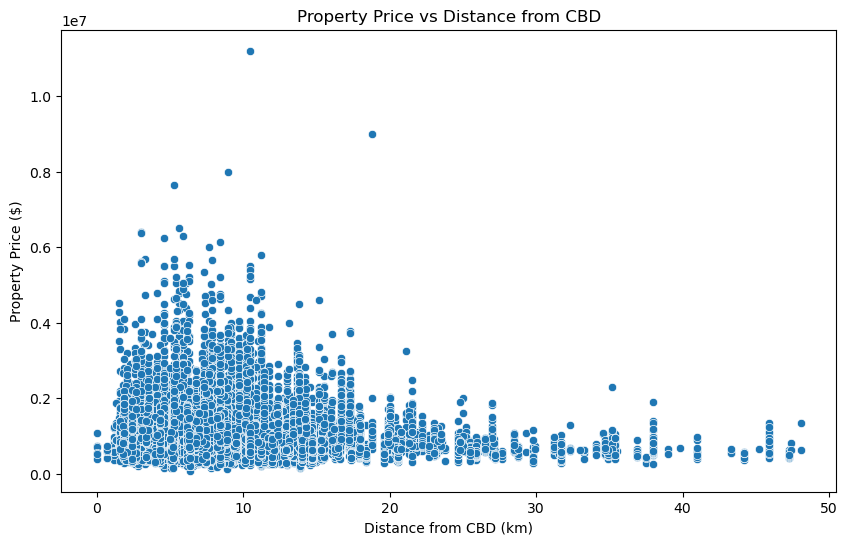

Spearman correlation coefficient: -0.21722441260383013
P-value: 5.2288411027955546e-191


In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


# Check for NaN values
print(df_main.isna().sum())

# Handle NaN values (if any)
df_main = df_main.dropna(subset=['Distance', 'Price'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Distance', y='Price', data=df_main)
plt.title('Property Price vs Distance from CBD')
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Property Price ($)')
plt.show()

# Calculate Spearman correlation coefficient
corr, p_value = spearmanr(df_main['Distance'], df_main['Price'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


8. Scatterplot

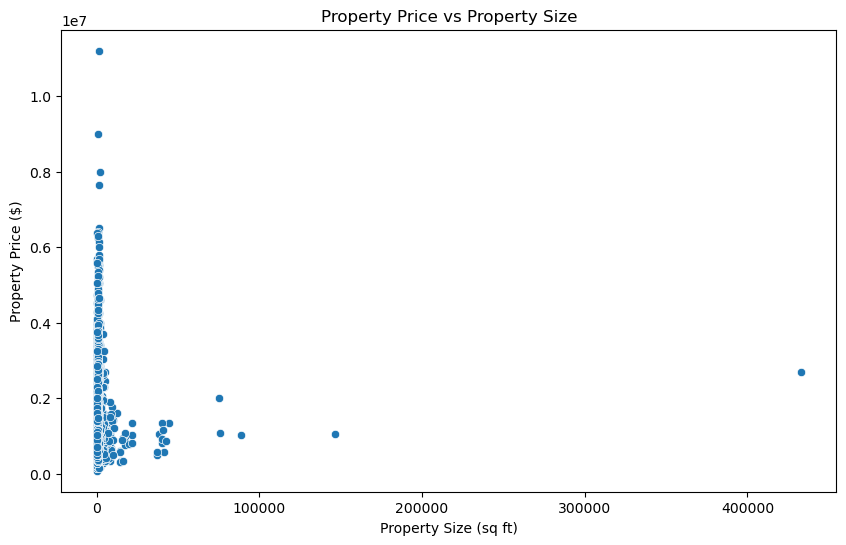

Spearman correlation coefficient: nan
P-value: nan


In [45]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr



# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Landsize', y='Price', data=df_main)
plt.title('Property Price vs Property Size')
plt.xlabel('Property Size (sq ft)')
plt.ylabel('Property Price ($)')
plt.show()

# Calculate Spearman correlation coefficient
corr, p_value = spearmanr(df_main['Landsize'], df_main['Price'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")


9. Spearman

Suburb               0
Address              0
Rooms                0
Type                 0
Price                0
Method               0
SellerG              0
Date                 0
Distance             0
Postcode             0
Bedroom2          6440
Bathroom          6446
Car               6823
Landsize          9264
BuildingArea     16590
YearBuilt        15162
CouncilArea          2
Lattitude         6253
Longtitude        6253
Regionname           2
Propertycount        2
dtype: int64


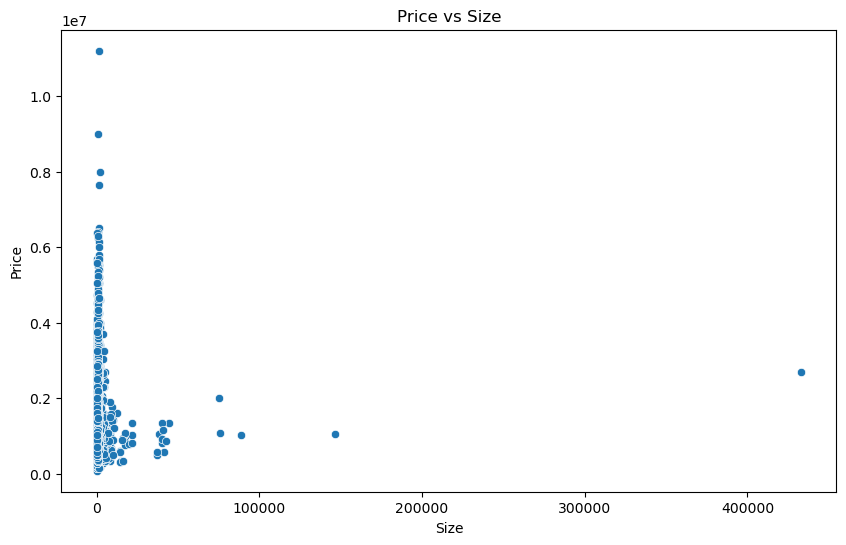

Spearman correlation coefficient: 0.2766120625869772
P-value: 0.0


In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import spearmanr


# Check for NaN values
print(df_main.isna().sum())

# Handle NaN values (if any)
df_main = df_main.dropna(subset=['Landsize', 'Price'])

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Landsize', y='Price', data=df_main)
plt.title('Price vs Size')
plt.xlabel('Size')
plt.ylabel('Price')
plt.show()

# Calculate Spearman correlation coefficient
corr, p_value = spearmanr(df_main['Landsize'], df_main['Price'])

print(f"Spearman correlation coefficient: {corr}")
print(f"P-value: {p_value}")

10.

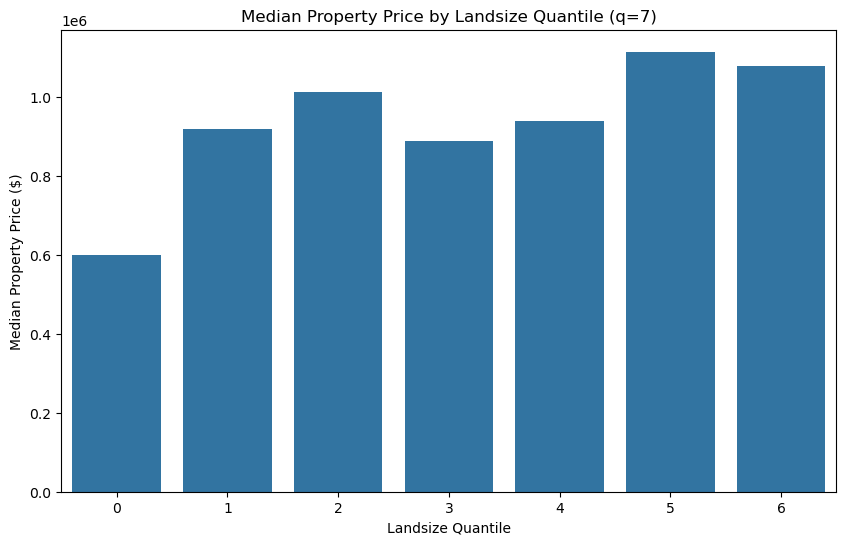

In [47]:

# Categorize landsize into 7 quantiles using .loc to avoid SettingWithCopyWarning
df_main.loc[:, 'Landsize_quantile'] = pd.qcut(df_main['Landsize'], q=7, labels=False)

# Calculate median property price for each quantile
median_prices = df_main.groupby('Landsize_quantile')['Price'].median().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Landsize_quantile', y='Price', data=median_prices)
plt.title('Median Property Price by Landsize Quantile (q=7)')
plt.xlabel('Landsize Quantile')
plt.ylabel('Median Property Price ($)')
plt.show()


Text(0, 0.5, 'Median Property Price ($)')

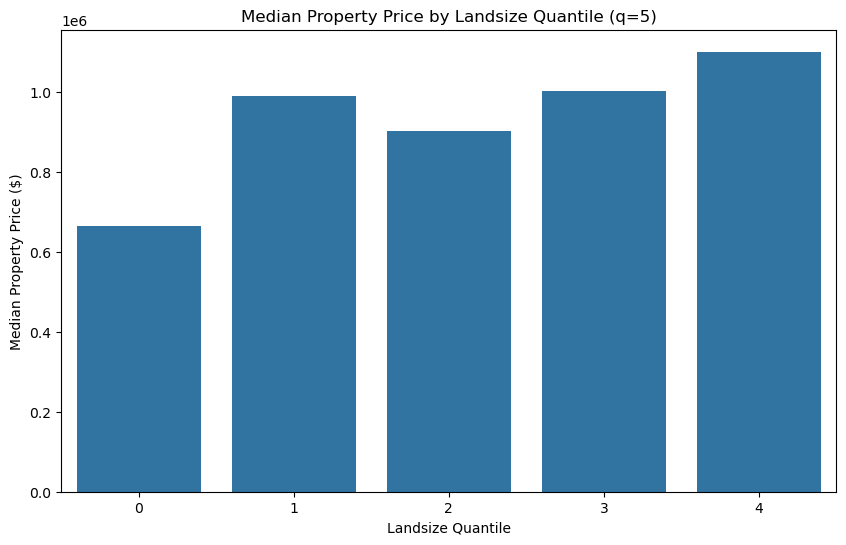

In [48]:
# Categorize landsize into 5 quantiles using .loc to avoid SettingWithCopyWarning
df_main.loc[:, 'Landsize_quantile'] = pd.qcut(df_main['Landsize'], q=5, labels=False)

# Calculate median property price for each quantile
median_prices = df_main.groupby('Landsize_quantile')['Price'].median().reset_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Landsize_quantile', y='Price', data=median_prices)
plt.title('Median Property Price by Landsize Quantile (q=5)')
plt.xlabel('Landsize Quantile')
plt.ylabel('Median Property Price ($)')

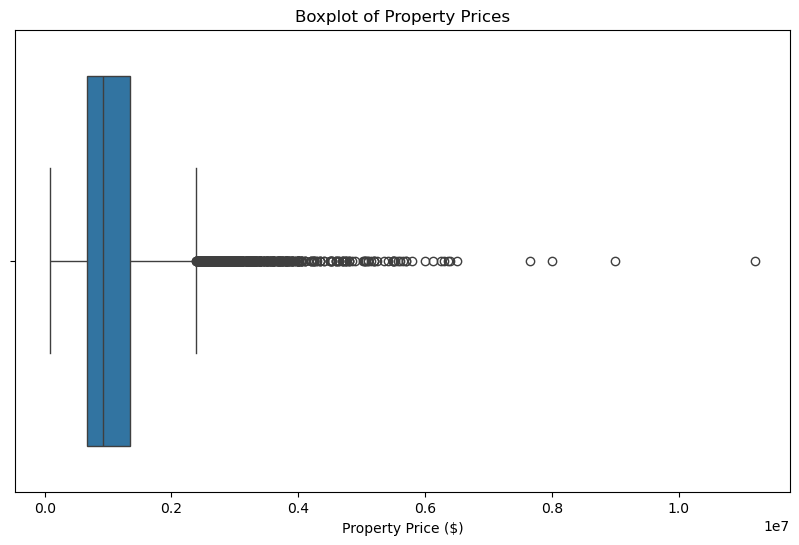

Lower Bound: -375000.0
Upper Bound: 2385000.0
Number of Outliers: 807
Percentage of Outliers: 8070.00%
             Suburb               Address  Rooms Type      Price Method  \
135     Albert Park  112 Beaconsfield Pde      3    h  2850000.0     PI   
152     Albert Park           2 Dundas Pl      3    h  2615000.0      S   
158     Albert Park         70 Barrett St      3    h  2575000.0      S   
166     Albert Park            97 Page St      3    h  3010000.0      S   
168     Albert Park         55 Withers St      4    h  2800000.0     VB   
...             ...                   ...    ...  ...        ...    ...   
34496   Middle Park      108 Hambleton St      3    h  3750000.0     SA   
34498   Middle Park        22 McGregor St      3    h  3250000.0      S   
34529  Moonee Ponds           104 Park St      5    h  2760000.0      S   
34632       Prahran          61 Murray St      3    h  2500000.0     VB   
34714   South Yarra            54 Oban St      3    h  2855000.0     PI 

In [49]:

# Create a boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_main['Price'])
plt.title('Boxplot of Property Prices')
plt.xlabel('Property Price ($)')
plt.show()

# Calculate IQR
Q1 = df_main['Price'].quantile(0.25)
Q3 = df_main['Price'].quantile(0.75)
IQR = Q3 - Q1

# Determine outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df_main[(df_main['Price'] < lower_bound) | (df_main['Price'] > upper_bound)]

# Calculate percentage of outliers
percentage_outliers = (len(outliers) / len(df)) * 100

print(f"Lower Bound: {lower_bound}")
print(f"Upper Bound: {upper_bound}")
print(f"Number of Outliers: {len(outliers)}")
print(f"Percentage of Outliers: {percentage_outliers:.2f}%")

# Outliers data frame
outliers_df = outliers.copy()
print(outliers_df)


10. QQ plot

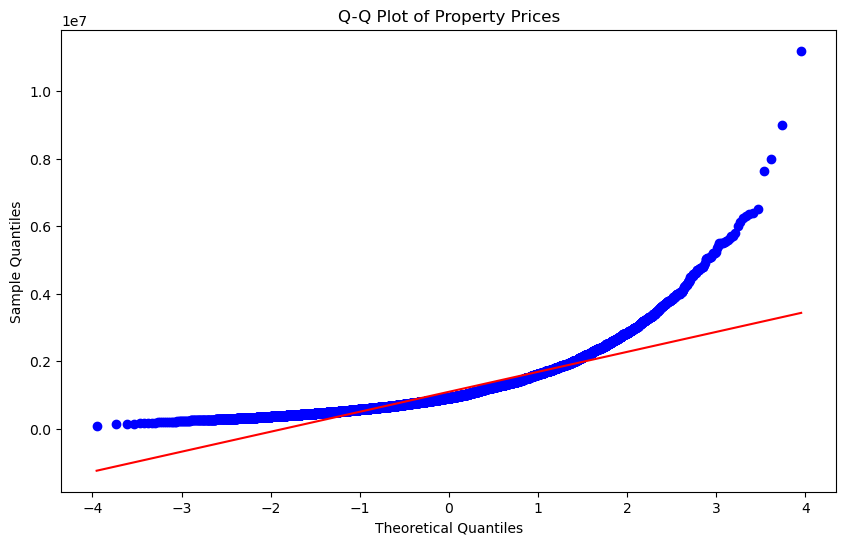

Skewness: 2.4368379634917177
Kurtosis: 12.503565547125646


In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import probplot, skew, kurtosis

# Create a Q-Q plot
plt.figure(figsize=(10, 6))
probplot(df_main['Price'], dist="norm", plot=plt)
plt.title('Q-Q Plot of Property Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

# Calculate skewness and kurtosis
price_skewness = skew(df_main['Price'])
price_kurtosis = kurtosis(df_main['Price'])

print(f"Skewness: {price_skewness}")
print(f"Kurtosis: {price_kurtosis}")


11. Normality test

In [51]:
import pandas as pd
from scipy.stats import shapiro

# Perform Shapiro-Wilk test
stat, p_value = shapiro(df_main['Price'])

print(f"Shapiro-Wilk Test Statistic: {stat}")
print(f"P-value: {p_value}")


Shapiro-Wilk Test Statistic: 0.8192573491976136
P-value: 7.893568722771195e-88


c:\Users\Elechiguerra\anaconda3\envs\labs_ih\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 17982.
  res = hypotest_fun_out(*samples, **kwds)


12. Difference between Property types and Prices

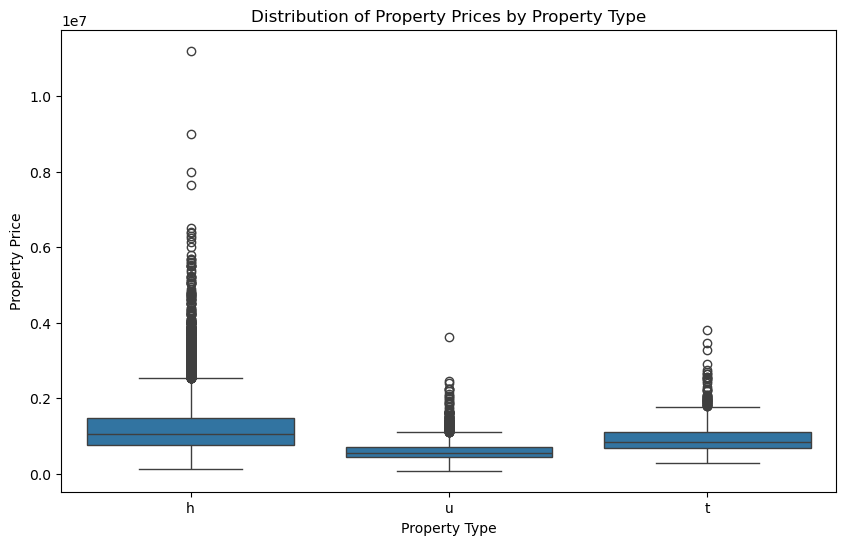

In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Type', y='Price', data=df_main)
plt.title('Distribution of Property Prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Property Price')
plt.show()


13. Region with the higest and lowest median price

In [53]:
# Calculate median property price for each region
median_prices = df_main.groupby('Regionname')['Price'].median().reset_index()

# Find the region with the highest and lowest median property prices
highest_median_region = median_prices.loc[median_prices['Price'].idxmax()]
lowest_median_region = median_prices.loc[median_prices['Price'].idxmin()]

print(f"Region with the highest median price: {highest_median_region['Regionname']} with a median price of ${highest_median_region['Price']}")
print(f"Region with the lowest median price: {lowest_median_region['Regionname']} with a median price of ${lowest_median_region['Price']}")


Region with the highest median price: Southern Metropolitan with a median price of $1338000.0
Region with the lowest median price: Western Victoria with a median price of $415000.0


14. Cramer´s V coefficient and Chi Square Test

Chi-Square Statistic: 1200.9554025894336
P-value: 3.5605427160032075e-235
Cramér's V: 0.1292154510105325


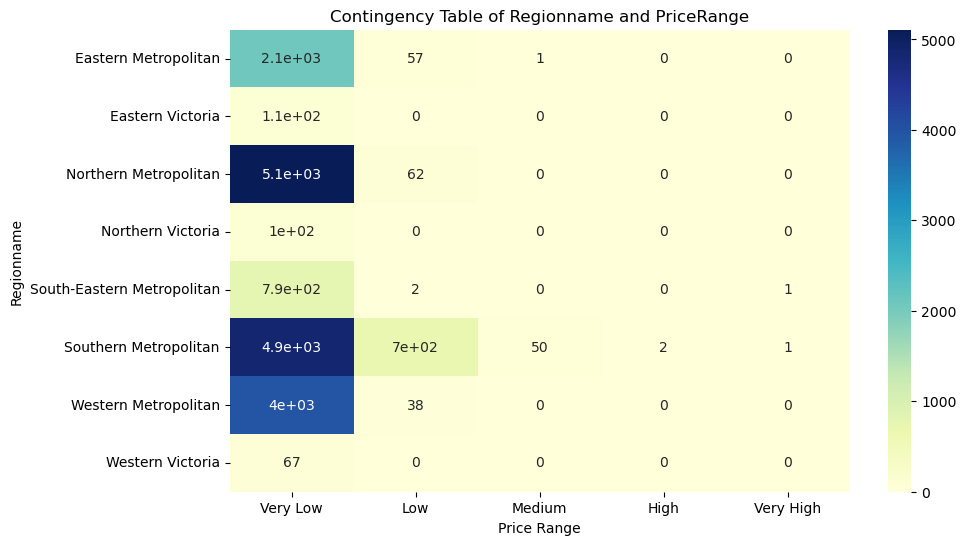

In [55]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
import seaborn as sns
import matplotlib.pyplot as plt

# Divide Price into five distinct ranges
df_main['PriceRange'] = pd.cut(df_main['Price'], bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])

# Create a contingency table
contingency_table = pd.crosstab(df_main['Regionname'], df_main['PriceRange'])

# Perform Chi-Square test of independence
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Calculate Cramér's V
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print(f"Chi-Square Statistic: {chi2}")
print(f"P-value: {p}")
print(f"Cramér's V: {cramers_v}")

# Visualize the contingency table
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu")
plt.title('Contingency Table of Regionname and PriceRange')
plt.xlabel('Price Range')
plt.ylabel('Regionname')
plt.show()


15. Percentage eartliest and latest years

In [74]:
# Convert the 'Date' column to datetime with dayfirst=True
df_main['Date'] = pd.to_datetime(df_main['Date'], dayfirst=True)

# Find the earliest and latest dates
earliest_date = df_main['Date'].min()
latest_date = df_main['Date'].max()

print(f"Earliest Date: {earliest_date}")
print(f"Latest Date: {latest_date}")

# Get the median prices for the earliest and latest dates
earliest_year_price = df_main[df_main['Date'] == earliest_date]['Price'].values[0]
latest_year_price = df_main[df_main['Date'] == latest_date]['Price'].values[0]

# Calculate percentage change
percentage_change = ((latest_year_price - earliest_year_price) / earliest_year_price) * 100

print(f"The percentage change in median price is {percentage_change:.2f}%")


Earliest Date: 2016-01-28 00:00:00
Latest Date: 2018-03-17 00:00:00
The percentage change in median price is 68.02%


16. Month with the highest number of houses sold

In [61]:
# Convert the 'Date' column to datetime
df_main['Date'] = pd.to_datetime(df_main['Date'], dayfirst=True)

# Extract the month from the 'Date' column
df_main['Month'] = df_main['Date'].dt.month

# Count the number of sales per month
sales_per_month = df_main['Month'].value_counts().sort_index()

print(sales_per_month)


Month
1      276
2     1383
3     1760
4      954
5     2031
6     1836
7     1987
8     1551
9     1854
10    1647
11    1765
12     938
Name: count, dtype: int64
